**Brain Tumor Detection using ML and DL**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import os
import math
import shutil #move files from one to another
import glob

* Load dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* 0 - Brain tumor and 1 - healthy

In [25]:
root_dir="/content/drive/MyDrive/AIDS Project/braintumor/brain_tumor_dataset"
images={}

for dir in os.listdir(root_dir):
  images[dir] = len(os.listdir(os.path.join(root_dir,dir)))

In [26]:
images.items()

dict_items([('no', 0), ('yes', 126)])

**splitting the dataset**

* 70% training
* 10% testing
* 20% validation

In [ ]:
def datasetFolder(path,split):
  if not os.path.exists("./" + path):
    os.mkdir("./" + path)

    for dir in os.listdir(root_dir):
      os.makedirs("./"+ path +"/" + dir)
      for img in np.random.choice(a= os.listdir(os.path.join(root_dir,dir)),
                                size=(math.floor(split * images[dir])-4),
                                replace=False):
        O=os.path.join(root_dir,dir,img)
        D=os.path.join("./"+ path ,dir)
        shutil.copy(O,D)
        os.remove(O)

  else:
    print(f"Folder {path} already exists.")

In [7]:
datasetFolder("train",0.7)

In [8]:
datasetFolder("val",0.2)

In [9]:
datasetFolder("test",0.1)

In [10]:
images={}

for dir in os.listdir(root_dir):
  images[dir] = len(os.listdir(os.path.join(root_dir,dir)))

images.items()

dict_items([('no', 13), ('yes', 14)])

**<h1>Model</h1>**

In [11]:
import tensorflow as tf

In [12]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [13]:
model=Sequential()
# kernel size size of convo filter
model.add(Conv2D(16,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

* shape here changes as by 2 each time due to convolution if not want to use padding="same in first layer

In [14]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
def imagePreprocess(path):
  # ---------
  # input: path
  # output:preprocessed images
  # ---------

  img_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True) 
  image=img_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode="binary")

  return image

In [16]:
path="/content/train"
train_data=imagePreprocess(path)

Found 3402 images belonging to 2 classes.


In [17]:
def imagePreprocessval(path):
  # ---------
  # input: path
  # output:preprocessed images
  # ---------

  img_data=ImageDataGenerator(rescale=1/255) 
  image=img_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode="binary")

  return image

In [18]:
path="/content/test"
test_data=imagePreprocessval(path)

Found 478 images belonging to 2 classes.


In [19]:
path="/content/val"
val_data=imagePreprocessval(path)

Found 966 images belonging to 2 classes.


In [20]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [21]:
es=EarlyStopping("val_accuracy",min_delta=0.01,patience=5,verbose=1,mode="auto")
mcp=ModelCheckpoint(monitor="val_accuracy",filepath="./model.h5",
                    verbose=1,save_best_only=True,mode="auto")

cd=[es,mcp]

**Training**

In [27]:
history=model.fit_generator(generator=train_data,steps_per_epoch=10,epochs=100,
                            verbose=1,validation_data=val_data,validation_steps=16,
                            callbacks=cd)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.5016 - accuracy: 0.7281
Epoch 1: val_accuracy did not improve from 0.83398
10/10 [==============================] - 7s 711ms/step - loss: 0.5016 - accuracy: 0.7281 - val_loss: 0.4392 - val_accuracy: 0.8047
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.4335 - accuracy: 0.8344
Epoch 2: val_accuracy improved from 0.83398 to 0.84375, saving model to ./model.h5
10/10 [==============================] - 10s 1s/step - loss: 0.4335 - accuracy: 0.8344 - val_loss: 0.3854 - val_accuracy: 0.8438
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.8000
Epoch 3: val_accuracy did not improve from 0.84375
10/10 [==============================] - 6s 611ms/step - loss: 0.4779 - accuracy: 0.8000 - val_loss: 0.4175 - val_accuracy: 0.8125
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.4552 - accuracy: 0.8094
Epoch 4: val_accuracy improved from 0.84375 

In [28]:
h=history.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

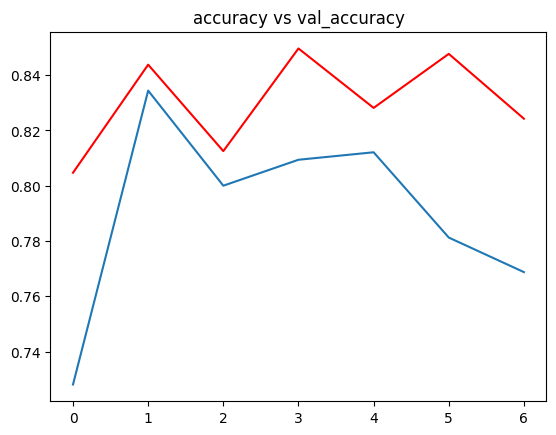

In [29]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")

plt.title('accuracy vs val_accuracy')
plt.show()

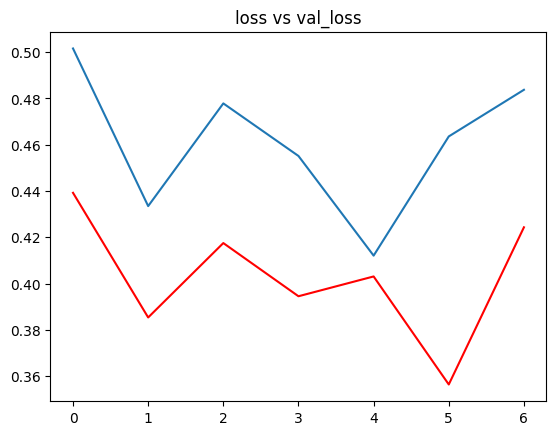

In [30]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")

plt.title('loss vs val_loss')
plt.show()

In [31]:
from keras.models import load_model

model=load_model("/content/model.h5")

In [32]:
acc=model.evaluate_generator(test_data)[1]
print(f"Accuracy is {acc*100}%")

Accuracy is 84.9372386932373%


**test**

In [33]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

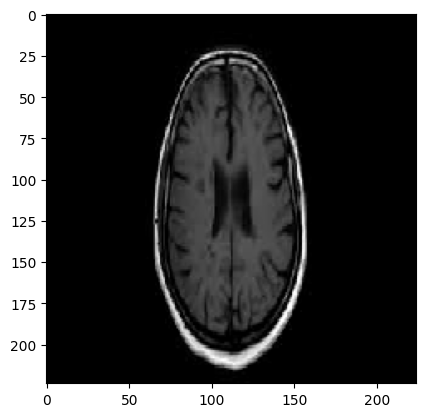

1/1 [==============================] - 1s 778ms/step
the image is not having tumor 0.0077781114


In [34]:
path="/content/drive/MyDrive/AIDS Project/braintumor/BRAINTUMOR/no/11 no.jpg"
img=load_img(path,target_size=(224,224))

input_arr=img_to_array(img)/255
input_arr.shape
plt.imshow(input_arr)
plt.show()

input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)[0][0]
pred

if (pred>=0 and pred<=0.51):
  print("the image is not having tumor",pred)
else:
  print("image is having tumor",pred)

In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}

**User Interface**

In [35]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 

In [36]:
import gradio as gr

In [37]:
import tensorflow as tf
from PIL import Image
import numpy as np


In [38]:
# Load the pre-trained model
model = tf.keras.models.load_model("/content/model.h5")

# Define the prediction function
def predict_cancer(image):
    # Preprocess the input image
    image = np.array(image)
    image = tf.image.resize(image, [224, 224])
    image /= 255.0
    image = tf.reshape(image, (1, 224, 224, 3))
    
    # Make predictions
    prediction = model.predict(image)
    if prediction > 0.51:
        return f"Infected with brain tumor. Prediction: {prediction*100}%" 
    else:
        return f"Not infected with brain tumor. Prediction: {prediction*100}%" 

# Create the Gradio interface
input_image = gr.inputs.Image()
output_label = gr.outputs.Label()
interface = gr.Interface(fn=predict_cancer, inputs=input_image, outputs=output_label, title="Brain tumor Detection")

# Launch the interface
interface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>